# Import Libraries

In [92]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

import time
from datetime import datetime, timedelta, timezone
import pytz

import matplotlib.pyplot as plt
import seaborn as sns

# Scraping Data from Jobstreet

In [93]:
def scraping_data(key, num_pages):
    base_url = 'https://www.jobstreet.co.id'
    # list untuk menyimpan data
    data = []

    # Looping untuk setiap halaman
    for page in range(1, num_pages + 1):

        url = f'{base_url}/id/{key}?page={page}'

        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        #a_tags = soup.find_all('a', attrs={'data-automation': 'job-list-view-job-link'})
        a_tags= soup.select('a[data-automation="job-list-view-job-link"]') #menggunakan CSS selector
        href_list = [a.get('href') for a in a_tags]

        for href_value in href_list:
            full_url = base_url + href_value
            job_response = requests.get(full_url)

            job_soup = BeautifulSoup(job_response.text, 'html.parser')

            job_title = job_soup.find('h1').text.strip()
            company_name = job_soup.find('span', class_='lnocuod', 
                                         attrs={'data-automation': 'advertiser-name'}).text.strip()
            job_description = job_soup.find('div', {'data-automation': 'jobAdDetails'}).get_text(strip=True)
            job_type = job_soup.find_all('span', class_='_1wkzzau0 a1msqi4y a1msqir')[2].text.strip()

            data.append({'Job Title': job_title, 'Company': company_name,
                         'Job Description': job_description, 'Job Type': job_type})

    df = pd.DataFrame(data)
    return df

df = scraping_data('data-science-jobs', num_pages=6)
df

,Job Title,Company,Job Description,Job Type
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual
2,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak
3,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu
...,...,...,...,...
187,Regional Data Analyst & Monitoring,Erajaya Group,Job Descriptions :Coordinating target setting ...,Penuh waktu
188,Data Engineer Staff,PT NTT Data Indonesia,Job Responsibilities/Descriptions :Analyze and...,Kontrak
189,Senior Data Engineer (Mandiri International Te...,Company Confidential,Job description & requirements🙌🏻About UsPT. Ma...,Kontrak
190,Financial Products Analyst,WALLSTREETDOCS BANDUNG,We are seeking strong analytic person who is f...,Penuh waktu


In [94]:
def check_skills(description, skills):
    description_lower = description.lower()
    found_skills = []

    for skill in skills:
        # Ganti 'Google Cloud Platform' dengan 'GCP'
        skill_pattern = re.escape(skill.lower()).replace('google cloud platform', 'GCP')
        pattern = r'\b{}\b'.format(skill_pattern)
        if re.search(pattern, description_lower):
            found_skills.append(skill)

    return found_skills if found_skills else ['Unknown']

def add_columns(df, skills, column_name):
    df[column_name] = df['Job Description'].apply(lambda x: check_skills(x, skills))
    return df

# Keterampilan yang ingin diperiksa
list_skills = ['SQL','Python','R','Javascript', 'C#','C++',
               'MySQL','Postgres','Azure','Database','AWS','GCP','Machine Learning',
               'OpenCV','tensorflow','Deep learning','scikit-learn','pandas',
               'CI/CD','MLOps','WandB','Neptune','Kubernetes','docker',
               'NoSQL','MongoDB','Hadoop','spark','Hive','MapReduce','kafka',
               'Git','Airflow','talend','Big Data',
               'Excel']


add_columns(df, list_skills, column_name='Skills')

,Job Title,Company,Job Description,Job Type,Skills
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu,"[SQL, Python, Azure]"
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual,"[SQL, R, Excel]"
2,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak,[Unknown]
3,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu,"[SQL, Python, R, Excel]"
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu,"[R, MySQL, Machine Learning, Hadoop, spark, Hi..."
...,...,...,...,...,...
187,Regional Data Analyst & Monitoring,Erajaya Group,Job Descriptions :Coordinating target setting ...,Penuh waktu,[Unknown]
188,Data Engineer Staff,PT NTT Data Indonesia,Job Responsibilities/Descriptions :Analyze and...,Kontrak,"[SQL, Python, Database]"
189,Senior Data Engineer (Mandiri International Te...,Company Confidential,Job description & requirements🙌🏻About UsPT. Ma...,Kontrak,"[SQL, AWS, Big Data]"
190,Financial Products Analyst,WALLSTREETDOCS BANDUNG,We are seeking strong analytic person who is f...,Penuh waktu,[Database]


In [95]:
list_viz_tools = ['tableau', 'power bi','QlikView','looker', 'kibana',
                  'matplotlib', 'seaborn', 'plotly', 'bokeh']
df = add_columns(df, list_viz_tools,column_name='Visualization Tools')
df

,Job Title,Company,Job Description,Job Type,Skills,Visualization Tools
0,Data Engineer,PT I Like Gym Indonesia,"Job Descriptions:Perform data exploration, dat...",Penuh waktu,"[SQL, Python, Azure]",[Unknown]
1,Data Science Internship,PT. Cakra Radha Mustika,Requirements :Min. Bachelor’s Degree in Statis...,Kasual,"[SQL, R, Excel]",[Unknown]
2,Internship Data Quality and Service Desk,PT Crif Lembaga Informasi Keuangan,Job roleThe Data Quality Intern will responsib...,Kontrak,[Unknown],[Unknown]
3,Data Analyst,PT HEJAZ FINANCIAL SERVICES,The Data Analyst will work under the supervisi...,Penuh waktu,"[SQL, Python, R, Excel]",[power bi]
4,Corporate Data Scientist Head,"PT Wahana Ottomitra Multiartha (WOM Finance), Tbk",Responsibilities :Bertanggung jawab dalam peng...,Penuh waktu,"[R, MySQL, Machine Learning, Hadoop, spark, Hi...",[Unknown]
...,...,...,...,...,...,...
187,Regional Data Analyst & Monitoring,Erajaya Group,Job Descriptions :Coordinating target setting ...,Penuh waktu,[Unknown],[Unknown]
188,Data Engineer Staff,PT NTT Data Indonesia,Job Responsibilities/Descriptions :Analyze and...,Kontrak,"[SQL, Python, Database]",[Unknown]
189,Senior Data Engineer (Mandiri International Te...,Company Confidential,Job description & requirements🙌🏻About UsPT. Ma...,Kontrak,"[SQL, AWS, Big Data]",[Unknown]
190,Financial Products Analyst,WALLSTREETDOCS BANDUNG,We are seeking strong analytic person who is f...,Penuh waktu,[Database],[Unknown]


In [96]:
df.loc[158,'Skills']

['Python', 'Machine Learning', 'tensorflow', 'Deep learning', 'scikit-learn']

In [97]:
target_skill = 'Python'

# Menghitung jumlah kemunculan 'Python' dalam kolom 'Skills'
python_count = df['Skills'].apply(lambda x: x.count(target_skill)).sum()

print(f"Jumlah kemunculan 'Python' dalam kolom 'Skills': {python_count}")

Jumlah kemunculan 'Python' dalam kolom 'Skills': 67


In [98]:
# Mendapatkan offset waktu lokal
local_offset = -time.timezone if (time.localtime().tm_isdst == 0) else -time.altzone
local_timezone = timezone(timedelta(seconds=local_offset))

# Mencetak informasi zona waktu
print(f"Local Timezone: {time.tzname[0]}")
print(f"Local Offset: {local_offset / 3600:.2f} hours")

# Mencetak waktu sekarang
current_time = datetime.now(local_timezone)
print(f"Current Time: {current_time} ({current_time.tzinfo})")

Local Timezone: WIB
Local Offset: 7.00 hours
Current Time: 2023-12-13 09:25:24.553319+07:00 (UTC+07:00)


In [99]:
# Menentukan zona waktu Indonesia
indonesia_timezone = pytz.timezone('Asia/Jakarta')
current_time = datetime.now(indonesia_timezone).strftime('%Y-%m-%d_%H-%M-%S')

In [100]:
file_name = f"job-{current_time}.csv"
df.to_csv(file_name, index=False)

# EDA (Exploratory Data Analysis)

In [101]:
# Menggabungkan semua skills menjadi satu list
all_skills = [skill for sublist in df['Skills'] for skill in sublist]

# Menghitung frekuensi setiap skills
skill_counts = pd.Series(all_skills).value_counts()

print(all_skills[:6])
print(skill_counts.head())

['SQL', 'Python', 'Azure', 'SQL', 'R', 'Excel']
SQL         79
Python      67
Database    57
Excel       48
R           37
Name: count, dtype: int64


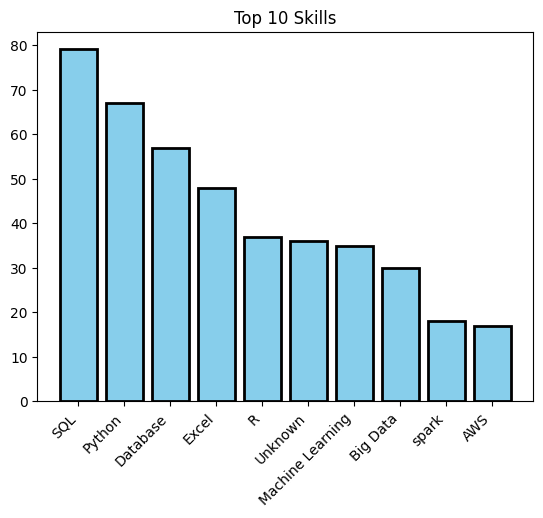

In [102]:
# Membuat plot bar chart
top_10_skills= skill_counts.head(10)
plt.bar(top_10_skills.index, top_10_skills.values,
        color='skyblue',
        edgecolor='black',
        linewidth=2)

plt.title('Top 10 Skills')
# plt.xlabel('Skills')
# plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

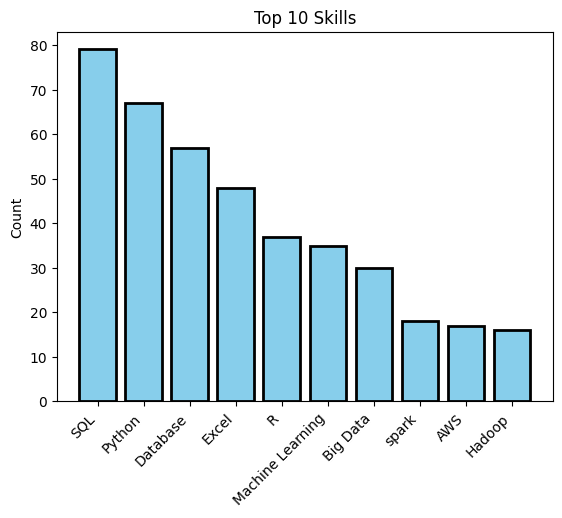

In [103]:
# Menghapus nilai 'unknown' dari perhitungan
skill_counts = skill_counts[skill_counts.index != 'Unknown']

# Membuat plot bar chart (ambil 10 teratas)
plt.bar(skill_counts.index[:10], skill_counts.values[:10], color='skyblue',
        edgecolor='black',
        linewidth=2)

plt.title('Top 10 Skills')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [104]:
# viz_tools = []

# for sub_vt in df['Visualization Tools']:
#     for vt in sub_vt:
#         viz_tools.append(vt)

In [105]:
viz_tools = [vt for sub_viz_tools in df['Visualization Tools'] for vt in sub_viz_tools]

# Menghitung frekuensi setiap viz_tools
vt_counts = pd.Series(viz_tools).value_counts()
vt_counts = vt_counts[vt_counts.index != 'Unknown']

print(viz_tools[:6])
print(vt_counts.head())

['Unknown', 'Unknown', 'Unknown', 'power bi', 'Unknown', 'Unknown']
tableau       37
power bi      30
looker        11
matplotlib     3
seaborn        2
Name: count, dtype: int64


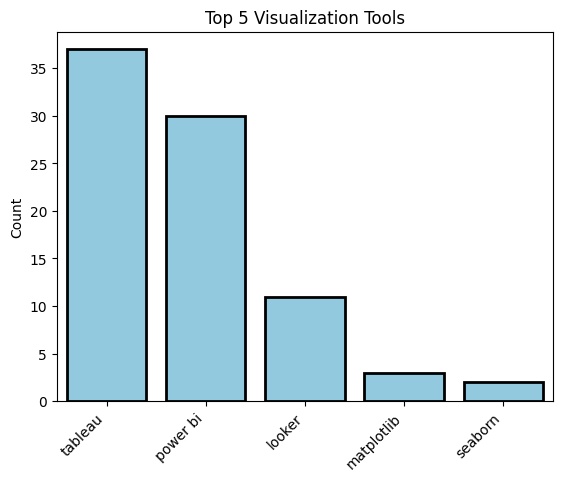

In [106]:
top_tools = vt_counts.head(5)

sns.barplot(x=top_tools.index, y=top_tools.values, color='skyblue', edgecolor='black', linewidth=2)
plt.title('Top 5 Visualization Tools')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()